# Tensorflow - CNN CIFAR10

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

## 1. CIFAR-10 데이터 불러오기 및 정규화

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()  # 데이터 불러오기

x_train=x_train.reshape(-1, 32, 32, 3)  # 텐서로 변환 (높이, 너비, 채널)
x_test=x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0 #정규화
x_test = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


## 2. CNN 모델 구축

In [3]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3),
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten()) # 3차원 텐서를 1차원 벡터로 변환

cnn.add(Dense(128, activation='relu')) # 은닉층
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax')) # 출력층

## 3. CNN 모델 컴파일 및 학습

In [4]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [5]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 62s 157ms/step - loss: 1.6569 - accuracy: 0.3943 - val_loss: 1.3078 - val_accuracy: 0.5371
Epoch 2/30
391/391 [==============================] - 59s 150ms/step - loss: 1.3391 - accuracy: 0.5189 - val_loss: 1.1482 - val_accuracy: 0.6034
Epoch 3/30
391/391 [==============================] - 59s 152ms/step - loss: 1.2145 - accuracy: 0.5687 - val_loss: 1.0686 - val_accuracy: 0.6301
Epoch 4/30
391/391 [==============================] - 60s 153ms/step - loss: 1.1279 - accuracy: 0.6003 - val_loss: 1.0422 - val_accuracy: 0.6371
Epoch 5/30
391/391 [==============================] - 60s 152ms/step - loss: 1.0756 - accuracy: 0.6201 - val_loss: 0.9591 - val_accuracy: 0.6614
Epoch 6/30
391/391 [==============================] - 58s 150ms/step - loss: 1.0265 - accuracy: 0.6350 - val_loss: 0.9532 - val_accuracy: 0.6662
Epoch 7/30
391/391 [==============================] - 57s 145ms/step - loss: 0.9899 - accuracy: 0.6483 - val_loss: 0.9161 - val_ac

## 4. 모델(정확도) 평가

In [6]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9494 - accuracy: 0.7118


[0.9494081735610962, 0.7117999792098999]

## 5. 정확도 그래프

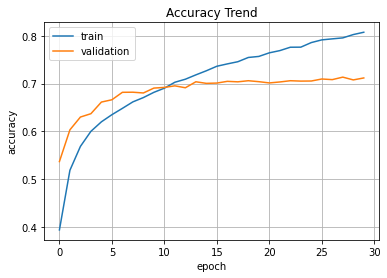

In [8]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

## 6. 손실함수 그래프

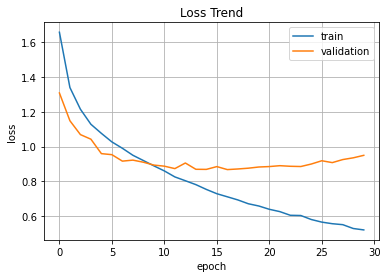

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

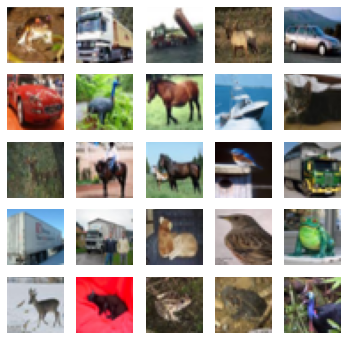

In [10]:
# 25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25):   # 25 개 이미지 출력
    plt.subplot(5,5, index + 1) # 5행 5열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    
plt.show()

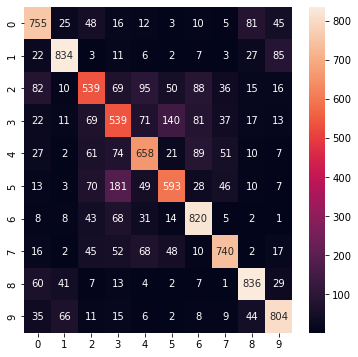

In [11]:
from sklearn. metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
predicted_value = cnn.predict(x_test)
cm = confusion_matrix(y_test, np.argmax(predicted_value, axis=-1))
    # y_test - 테스트 데이터 정답 (10진수) [원핫 인코딩이 아니기 때문]
    # 예측값(predicted_value) - softmax에 의해 10개의 노드로 출력됨
    # numpy의 argmax를 통해 가장 높은 값의 노드로 출력됨.
    
sns.heatmap(cm, annot=True, fmt='d')
plt.show()